In [130]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [131]:
df = pd.read_csv("../PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv")

In [132]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [133]:
df['fare_amount'].describe

<bound method NDFrame.describe of 0          6.5
1          6.9
2         10.1
3          8.9
4         19.7
          ... 
119995    15.3
119996    15.3
119997    12.5
119998     4.9
119999     5.3
Name: fare_amount, Length: 120000, dtype: float64>

In [134]:
#preprocessing (feature engineering)
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [135]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude','pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [136]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [139]:
df.head()
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)

In [140]:
mytime = df['pickup_datetime'][0]
mytime

'2010-04-19 08:17:56 UTC'

In [141]:
#mytime.hour ## domain knowledge <data analyze>

In [142]:
df['Hour'] = df['EDTdate'].dt.hour

In [143]:
df['AMorPM'] = np.where(df['Hour'] < 12, 'am', 'pm')

In [144]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56,4,am
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53,11,am
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26,7,am
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03,17,pm
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01,22,pm


In [145]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM'],
      dtype='object')

In [146]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a") ## make mon, tue, wed, thur,fri

In [147]:
cat_cols = ['Hour', 'AMorPM','Weekday'] # categorical columns 3 categories
cont_col = ['pickup_longitude', 
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [148]:
y_col = ['fare_amount']

In [149]:
# make categorical columns to cat type
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [150]:
df.dtypes ## see what you made categorical

pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDTdate              datetime64[ns]
Hour                       category
AMorPM                     category
Weekday                    category
dtype: object

In [151]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [152]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [153]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [154]:
df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [155]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [156]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [157]:
cats = np.stack([hr,ampm,wkdy], axis=1)
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [158]:
cats = torch.tensor(cats, dtype =torch.int64)

In [159]:
conts = np.stack([df[col].values for col in cont_col],axis =1)

In [160]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [161]:
conts = torch.tensor(conts, dtype = torch.float)

In [162]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [163]:
y = torch.tensor(df[y_col].values,dtype=torch.float).reshape(-1,1)
#1 열로 남은 데이터 알아서 row 지정(-1)

In [164]:
cats.shape

torch.Size([120000, 3])

In [165]:
conts.shape

torch.Size([120000, 6])

In [166]:
y.shape

torch.Size([120000, 1])

In [167]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [168]:
cat_szs

[24, 2, 7]

In [169]:
emb_szs = [(size, min(50,(size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [170]:
catz = cats[:2]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [171]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [172]:
embeddingz = []

for i, e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [173]:
embeddingz

[tensor([[-0.1880,  0.0683, -0.4652,  0.7785, -0.8310, -0.4033,  0.2822, -0.0526,
          -1.7624,  0.8139, -1.5377,  1.6798],
         [ 1.3521, -0.1338, -0.7185,  0.3997, -0.3772, -2.4669,  2.6288,  0.3168,
          -0.3519,  1.5085, -0.4748,  0.9093]], grad_fn=<EmbeddingBackward0>),
 tensor([[1.0538],
         [1.0538]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.1283, 0.7799, 0.8117, 0.8502],
         [2.3308, 0.7918, 1.1393, 1.6719]], grad_fn=<EmbeddingBackward0>)]

In [174]:
z = torch.cat(embeddingz,1)
z

tensor([[-0.1880,  0.0683, -0.4652,  0.7785, -0.8310, -0.4033,  0.2822, -0.0526,
         -1.7624,  0.8139, -1.5377,  1.6798,  1.0538,  0.1283,  0.7799,  0.8117,
          0.8502],
        [ 1.3521, -0.1338, -0.7185,  0.3997, -0.3772, -2.4669,  2.6288,  0.3168,
         -0.3519,  1.5085, -0.4748,  0.9093,  1.0538,  2.3308,  0.7918,  1.1393,
          1.6719]], grad_fn=<CatBackward0>)

In [175]:
selfembdrop = nn.Dropout(0.4)

In [176]:
z = selfembdrop(z)
z

tensor([[-0.3134,  0.1138, -0.0000,  1.2975, -0.0000, -0.6722,  0.0000, -0.0000,
         -2.9373,  1.3566, -2.5628,  2.7997,  1.7563,  0.2138,  1.2998,  1.3528,
          1.4171],
        [ 2.2534, -0.2229, -1.1976,  0.6662, -0.0000, -4.1115,  4.3813,  0.0000,
         -0.5865,  0.0000, -0.7913,  1.5155,  0.0000,  3.8846,  0.0000,  0.0000,
          0.0000]], grad_fn=<MulBackward0>)

In [177]:
from re import X


class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):

        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace = True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)
    
    def forward(self,x_cat,x_cont):
        embeddings = []

        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        
        x = torch.cat(embeddings,1)
        x = self.emb_drop(X)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x

In [178]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1],1,[200,100],p =0.4)

In [179]:
criterion = nn.MSELoss() #np.sqrt(MSE) --> RMSE
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [180]:
batch_size = 60000
test_size = int(batch_size*0.2) 

In [181]:
# Data suffled already
cat_train = cats[:batch_size - test_size]
cat_test = cats[batch_size - test_size:batch_size]
con_train = conts[:batch_size - test_size]
con_test = conts[batch_size - test_size:batch_size]

In [182]:
y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size:batch_size]

In [183]:
len(cat_train)

48000

In [184]:
len(con_train)

48000

In [185]:
len(cat_test)

12000

In [186]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i += 1

    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss)

    if i %10 ==1:
        print(f'epoch: {i} loss is {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
duration = time.time()- start_time
print(f'Trainig took {duration/60} minutes')

epoch: 1 loss is 12.585602760314941
epoch: 11 loss is 11.696335792541504
epoch: 21 loss is 11.118354797363281
epoch: 31 loss is 10.741506576538086
epoch: 41 loss is 10.454047203063965
epoch: 51 loss is 10.23058795928955
epoch: 61 loss is 10.035178184509277
epoch: 71 loss is 9.827882766723633
epoch: 81 loss is 9.636918067932129
epoch: 91 loss is 9.426532745361328
epoch: 101 loss is 9.16361141204834
epoch: 111 loss is 8.893996238708496
epoch: 121 loss is 8.558052062988281
epoch: 131 loss is 8.197497367858887
epoch: 141 loss is 7.815893650054932
epoch: 151 loss is 7.393110752105713
epoch: 161 loss is 6.916219711303711
epoch: 171 loss is 6.443551540374756
epoch: 181 loss is 5.959005832672119
epoch: 191 loss is 5.476579189300537
epoch: 201 loss is 5.048316955566406
epoch: 211 loss is 4.622759819030762
epoch: 221 loss is 4.290164470672607
epoch: 231 loss is 4.115134239196777
epoch: 241 loss is 3.945330858230591
epoch: 251 loss is 3.885172128677368
epoch: 261 loss is 3.8129525184631348
epoch:

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

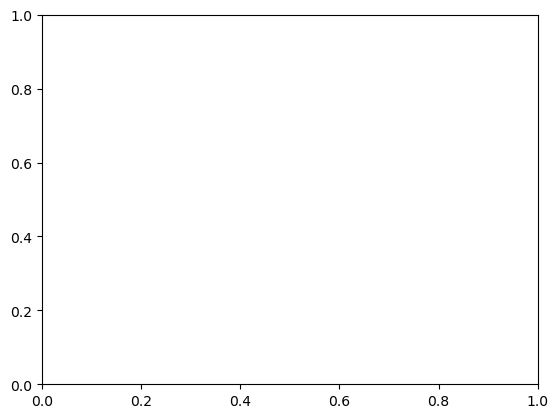

In [187]:
plt.plot(range(epochs), losses)

In [189]:
with torch.no_grad():

    y_val = model(cat_test,con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
loss

tensor(3.6117)

In [192]:
for i in range(10):
    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(f'{i}.) PREDICTED: {y_val[i].item():8.2f} TRUE: {y_test[i].item():8.2f} THE DIFF: {diff:8.2f}')

0.) PREDICTED:     5.63 TRUE:     2.90 THE DIFF:     2.73
1.) PREDICTED:    26.18 TRUE:     5.70 THE DIFF:    20.48
2.) PREDICTED:    11.27 TRUE:     7.70 THE DIFF:     3.57
3.) PREDICTED:     9.77 TRUE:    12.50 THE DIFF:     2.73
4.) PREDICTED:     9.84 TRUE:     4.10 THE DIFF:     5.74
5.) PREDICTED:     7.51 TRUE:     5.30 THE DIFF:     2.21
6.) PREDICTED:     2.03 TRUE:     3.70 THE DIFF:     1.67
7.) PREDICTED:    17.52 TRUE:    14.50 THE DIFF:     3.02
8.) PREDICTED:     7.62 TRUE:     5.70 THE DIFF:     1.92
9.) PREDICTED:     9.09 TRUE:    10.10 THE DIFF:     1.01


In [194]:
torch.save(model.state_dict(), '../models/TexiModel.pt')